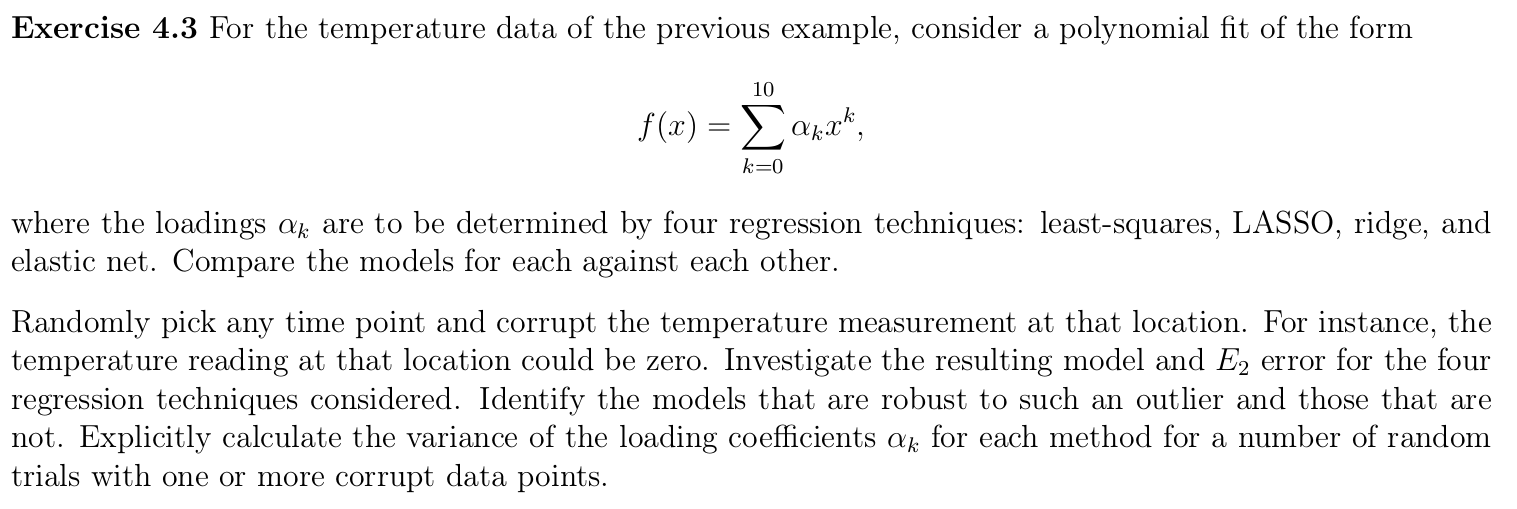

In [124]:
import numpy as np
import matplotlib.pyplot as plt

#data
Temp = np.array([75, 77, 76, 73, 69, 68, 63, 59,
                 57, 55, 54, 52, 50, 50, 49, 49,
                 49, 50, 54, 56, 59, 63, 67, 72])
x = np.linspace(1, 24, 24)

In [152]:
#Build the matrix
A = np.zeros((24,12))
for j in range(11):
    A[:,j] = np.power(x,j)
A[:,11] = Temp

In [137]:
#least-squares solution
least_squares = np.linalg.pinv(A) @ Temp
least_squares

array([ 6.30121313e+01,  2.16168035e+01, -1.30474133e+01,  4.20225362e+00,
       -8.62955556e-01,  1.13381353e-01, -9.53582599e-03,  5.08890445e-04,
       -1.66298499e-05,  3.03160436e-07, -2.36003303e-09])

In [172]:
from sklearn import linear_model
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
scalerx = StandardScaler()
scalery = StandardScaler()
A_scaled = scalerx.fit_transform(A[:,:-1])
Ar = A_scaled
br = scalery.fit_transform(Temp)
ridge_reg = linear_model.Ridge(alpha = 1.0).fit(Ar, br)
ridge = ridge_reg.coef_

ValueError: Expected 2D array, got 1D array instead:
array=[75. 77. 76. 73. 69. 68. 63. 59. 57. 55. 54. 52. 50. 50. 49. 49. 49. 50.
 54. 56. 59. 63. 67. 72.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

ValueError: Expected 2D array, got 1D array instead:
array=[ 0.         -1.27926941 -0.37256138  0.12596653  0.33211165  0.3739008
  0.32984168  0.24356569  0.13889774  0.0288123  -0.07969496].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

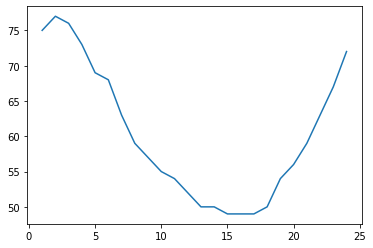

In [168]:
plt.plot(x, Temp)
#plt.plot(x, A @ least_squares)
rr = A[:,:-1] @ ridge
rr = scaler.inverse_transform(ridge)
plt.plot(x, rr)
#plt.plot(x, A @ lasso)
#plt.plot(x, A @ en)
plt.show()